In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from scipy import linalg

In [2]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
Lx = 0.01
Ly = 0.01
nx = 21
ny = 21
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)
alpha = 1e-4

x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

Tb = 100.0
T0 = 20.0 * numpy.ones((ny, nx))
T0[:, 0] = Tb
T0[0, :] = Tb

In [14]:
def btcs(T0, nt, dt, dx, alpha, Tb):
    ny, nx = T0.shape
    # get interior poins
    M, N = nx - 2, ny - 2
    # constants
    sigma = alpha * dt / dx**2
    A = lhs_operator(M, N, sigma)
    T = T0[1:-1, 1:-1].flatten()
    for n in range(nt):
        b = rhs_vector(T, M, N, sigma, Tb)
        T = linalg.solve(A, b)
        if T[int(ny / 2) * M + int(nx / 2)] >= 70.0:
            print('Alert! Melting down!')
            break
    print('[time step {}] center at T={:.2f} at t={:.2f} s'.format(n+1, T[int(ny / 2) * M + int(nx / 2)], (n+1)*dt))
    return map_1d_to_2d(T, nx, ny, Tb)

In [15]:
def lhs_operator(M, N, sigma):
    A = numpy.zeros((M * N, M * N))
    for j in range(N):
        for i in range(M):
            I = j * M + i # row index
            IW = I - 1
            IN = I + M
            IE = I + 1
            IS = I - M
            if i == 0 and j == 0 :
                A[I, I] = 1.0 / sigma + 4.0
                A[I, IN] = -1.0
                A[I, IE] = -1.0
            elif i == M - 1 and j == 0 :
                A[I, I] = 1.0 / sigma + 3.0
                A[I, IN] = -1.0
                A[I, IW] = -1.0
            elif i == 0 and j == N - 1 :
                A[I, I] = 1.0 / sigma + 3.0
                A[I, IS] = -1.0
                A[I, IE] = -1.0
            elif i == M - 1 and j == N - 1:
                A[I, I] = 1.0 / sigma + 2.0
                A[I, IS] = -1.0
                A[I, IW] = -1.0
            elif i == M - 1 :
                A[I, I] = 1.0 / sigma + 3.0
                A[I, IS] = -1.0
                A[I, IN] = -1.0
                A[I, IW] = -1.0
            elif j == N - 1 :
                A[I, I] = 1.0 / sigma + 3.0
                A[I, IS] = -1.0
                A[I, IW] = -1.0
                A[I, IE] = -1.0
            elif i == 0 :
                A[I, I] = 1.0 / sigma + 4.0
                A[I, IS] = -1.0
                A[I, IN] = -1.0
                A[I, IE] = -1.0
            elif j == 0 :
                A[I, I] = 1.0 / sigma + 4.0
                A[I, IN] = -1.0
                A[I, IW] = -1.0
                A[I, IE] = -1.0
            else:
                A[I, I] = 1.0 / sigma + 4.0
                A[I, IS] = -1.0
                A[I, IN] = -1.0
                A[I, IW] = -1.0
                A[I, IE] = -1.0
    
    return A

In [16]:
def map_1d_to_2d(T1, nx, ny, Tb):
    T = numpy.zeros((ny, nx))
    T[1:-1, 1:-1] = T1.reshape((ny-2, nx-2))
    # boundary condiions
    T[:,0] = Tb
    T[0,:] = Tb
    T[:,-1] = T[:,-2]
    T[-1,:] = T[-2,:]
    return T

In [19]:
def rhs_vector(T, M, N, sigma, Tb):
    b = T / sigma
    for j in range(N):
        for i in range(M):
            I = j * M + i
            if i == 0:
                b[I] += Tb
            if j == 0:
                b[I] += Tb
    return b

In [20]:
sigma = 0.25
dt = sigma * min(dx, dy)**2 / alpha
nt = 300

T = btcs(T0, nt, dt, dx, alpha, Tb)

Alert! Melting down!
[time step 297] center at T=70.02 at t=0.19 s


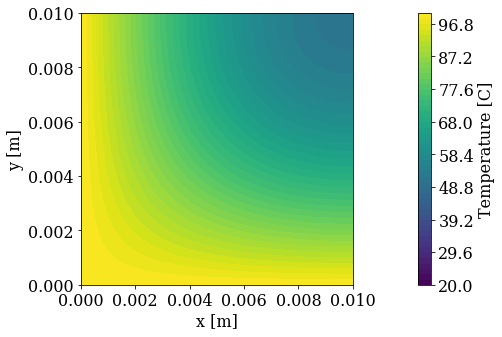

In [21]:
pyplot.figure(figsize=(8.0, 5.0))
pyplot.xlabel('x [m]')
pyplot.ylabel('y [m]')
levels = numpy.linspace(20.0, 100.0, num=51)
contf = pyplot.contourf(x, y, T, levels=levels)
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature [C]')
pyplot.axis('scaled', adjustable='box');